# Final Report

### Loading relevant libraries

In [37]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 7)

## Reading the data

In [38]:
drugs_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Assigning column names

In [39]:
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Neuroticism", "Extraversion", 
                          "Openness_to_Experience", "Agreeableness", "Conscientiousness", "Impulsiveness", 
                          "Sensation_Seeking", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke",
                          "Crack", "Ecstacy", "Heorin", "LegalH", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA")
drugs_data

ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,⋯,Ecstacy,Heorin,LegalH,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,NA
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,⋯,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Removing unneccesary variables

In [40]:
alcohol_data <- select(drugs_data, Age, Neuroticism,
                       Extraversion, Openness_to_Experience,
                       Agreeableness, Impulsiveness, Conscientiousness, Sensation_Seeking, Alcohol, Semer)
alcohol_data

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Sensation_Seeking,Alcohol,Semer
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.21712,-0.00665,-1.18084,CL5,CL2
-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.71126,-0.14277,-0.21575,CL5,CL4
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6,CL0
-0.95197,-0.14882,-0.80615,-0.01928,0.59042,-1.37983,0.58489,-1.18084,CL4,CL2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.07854,1.13281,-1.37639,-1.27553,-1.77200,0.52975,-1.38502,-0.52593,CL4,CL6
-0.95197,0.91093,-1.92173,0.29338,-1.62090,1.29221,-2.57309,1.22470,CL5,CL4
-0.95197,-0.46725,2.12700,1.65653,1.11406,0.88113,0.41594,1.22470,CL4,CL6


### Filtering out irrelevant observations

In [41]:
alcohol_data_filtered <- alcohol_data |>
                         filter(Semer == "CL0") |>
                         select(-Semer) |>
                         mutate(Alcohol = as_factor(Alcohol))
alcohol_data_filtered

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Sensation_Seeking,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
0.49788,-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,CL5
1.82213,-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,CL5
1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5
-0.95197,-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,CL5


### Splitting the data

In [42]:
set.seed(69)
alcohol_split <- initial_split(alcohol_data_filtered, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)
alcohol_train

Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Sensation_Seeking,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.82213,0.04257,-0.69509,-1.11902,-0.45321,-1.37983,-0.40581,-2.07848,CL3
-0.07854,-0.58016,0.63779,-1.97495,0.28783,-0.71126,0.75830,-0.52593,CL1
2.59171,-0.14882,-0.80615,-0.97631,0.76096,-1.37983,0.41594,-1.54858,CL3
1.09449,-0.34799,1.93886,0.29338,0.43852,-0.21712,0.58489,-0.21575,CL3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.09449,-0.34799,-1.09207,-0.17779,-0.60633,-0.71126,0.58489,-0.52593,CL6
1.09449,2.28554,-1.23177,-0.01928,-2.53830,-0.21712,-2.90161,1.22470,CL2
-0.07854,-0.46725,-1.50796,-0.58331,-0.30172,0.52975,-0.40581,0.40148,CL6


### Distribution of the response variable

In [43]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n()) |>
                 bind_cols(c("Never Used", "Used over a Decade Ago", "Used in Last Decade",
             "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"))
colnames(alcohol_count) <- c("Class", "No. of Individuals", "Meaning")
alcohol_count

New names:
• `` -> `...3`


Class,No. of Individuals,Meaning
<fct>,<int>,<chr>
CL6,66,Never Used
CL5,137,Used over a Decade Ago
CL4,48,Used in Last Decade
CL0,16,Used in Last Year
CL3,35,Used in Last Month
CL1,6,Used in Last Week
CL2,11,Used in Last Day


### Mean of the potential predictors for each class

In [44]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(neuroticism_mean = mean(Neuroticism),
                           extraversion_mean = mean(Extraversion),
                           openness_to_experience_mean = mean(Openness_to_Experience),
                           agreeableness_mean = mean(Agreeableness),
                           impulsiveness_mean = mean(Impulsiveness),
                           conscientiousness_mean = mean(Conscientiousness))
alcohol_means

Alcohol,neuroticism_mean,extraversion_mean,openness_to_experience_mean,agreeableness_mean,impulsiveness_mean,conscientiousness_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CL6,-0.1070455,0.0003836364,-0.2337532,0.20108061,-0.2593374,0.33426621
CL5,-0.2104826,0.1737224088,-0.3266285,0.33174526,-0.3653848,0.39946504
CL4,-0.2381323,-0.0304225000,-0.3216004,0.37365021,-0.2580952,0.35648354
CL0,0.1190381,0.1158106250,0.0469375,0.02410312,-0.3413656,0.23926312
CL3,-0.2083551,-0.1460434286,-0.4620551,-0.05292543,-0.4505683,-0.13884057
CL1,-0.5894517,0.4553266667,-0.9030767,0.75377667,-0.2583617,1.11948667
CL2,0.5474755,-0.5713127273,-0.6111855,-0.25231273,-0.4266245,0.02889545


Age,Alcohol,predictors,values
<dbl>,<fct>,<chr>,<dbl>
1.82213,CL3,Neuroticism,0.04257
1.82213,CL3,Extraversion,-0.69509
1.82213,CL3,Openness_to_Experience,-1.11902
1.82213,CL3,Agreeableness,-0.45321
⋮,⋮,⋮,⋮
-0.07854,CL6,Impulsiveness,0.52975
-0.07854,CL6,Conscientiousness,-0.40581
-0.07854,CL6,Sensation_Seeking,0.40148


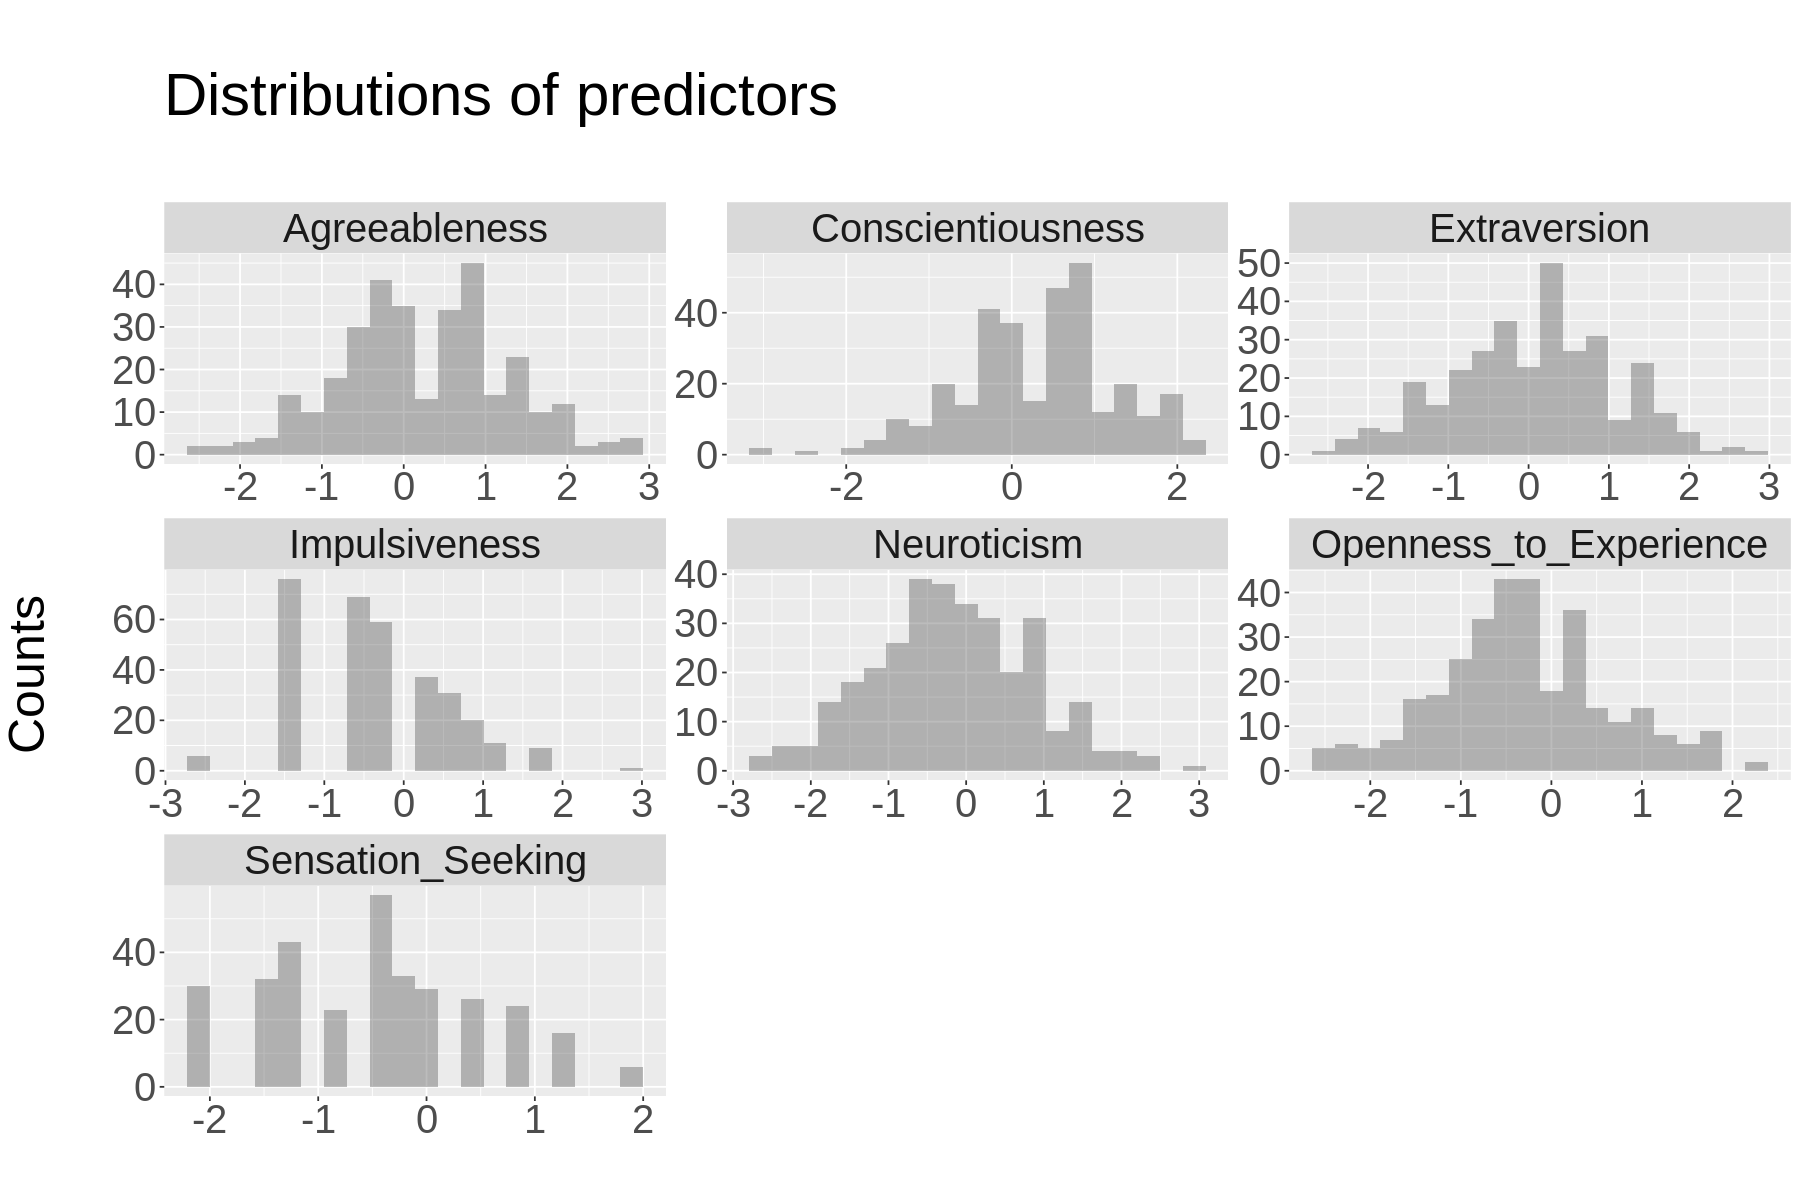

In [45]:
options(repr.plot.width = 15, repr.plot.height = 10)
# nscore <- ggplot(alcohol_train, aes(x = Neuroticism, fill = as_factor(Alcohol))) +
#           geom_histogram() + 
#           scale_fill_discrete(breaks = c("CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"),
#                             labels = c("Never Used", "Used Over A Decade Ago", "Used in Last Decade", "Used in Last Year", 
#                                       "Used in Last Month", "Used in Last Week", "Used in Last Day")) +
#           labs(x = "Neuroticism Score (Standardized)", y = "Count", fill = "Alcohol Consumption") +
#           facet_wrap(vars(Alcohol)) +
#           ggtitle("Neuroticism vs. Alcohol Consumption") +
#           theme(text = element_text(size = 20))

# nscore

alcohol_longer <- alcohol_train %>% 
                pivot_longer(cols = Neuroticism:Sensation_Seeking,
                             names_to = "predictors",
                             values_to = "values")
alcohol_longer

alcohol_plot <- alcohol_longer %>%
    ggplot(aes(x = values)) + 
    geom_histogram(alpha = 0.4, position = 'identity', bins = 20) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of predictors\n") +
    facet_wrap(vars(predictors), 
               scales = "free") +
    theme(text = element_text(size = 30)) +
    scale_fill_brewer(palette = "RdBu") # To see more colorblind friendly pallete: display.brewer.all(colorblindFriendly = T)
alcohol_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



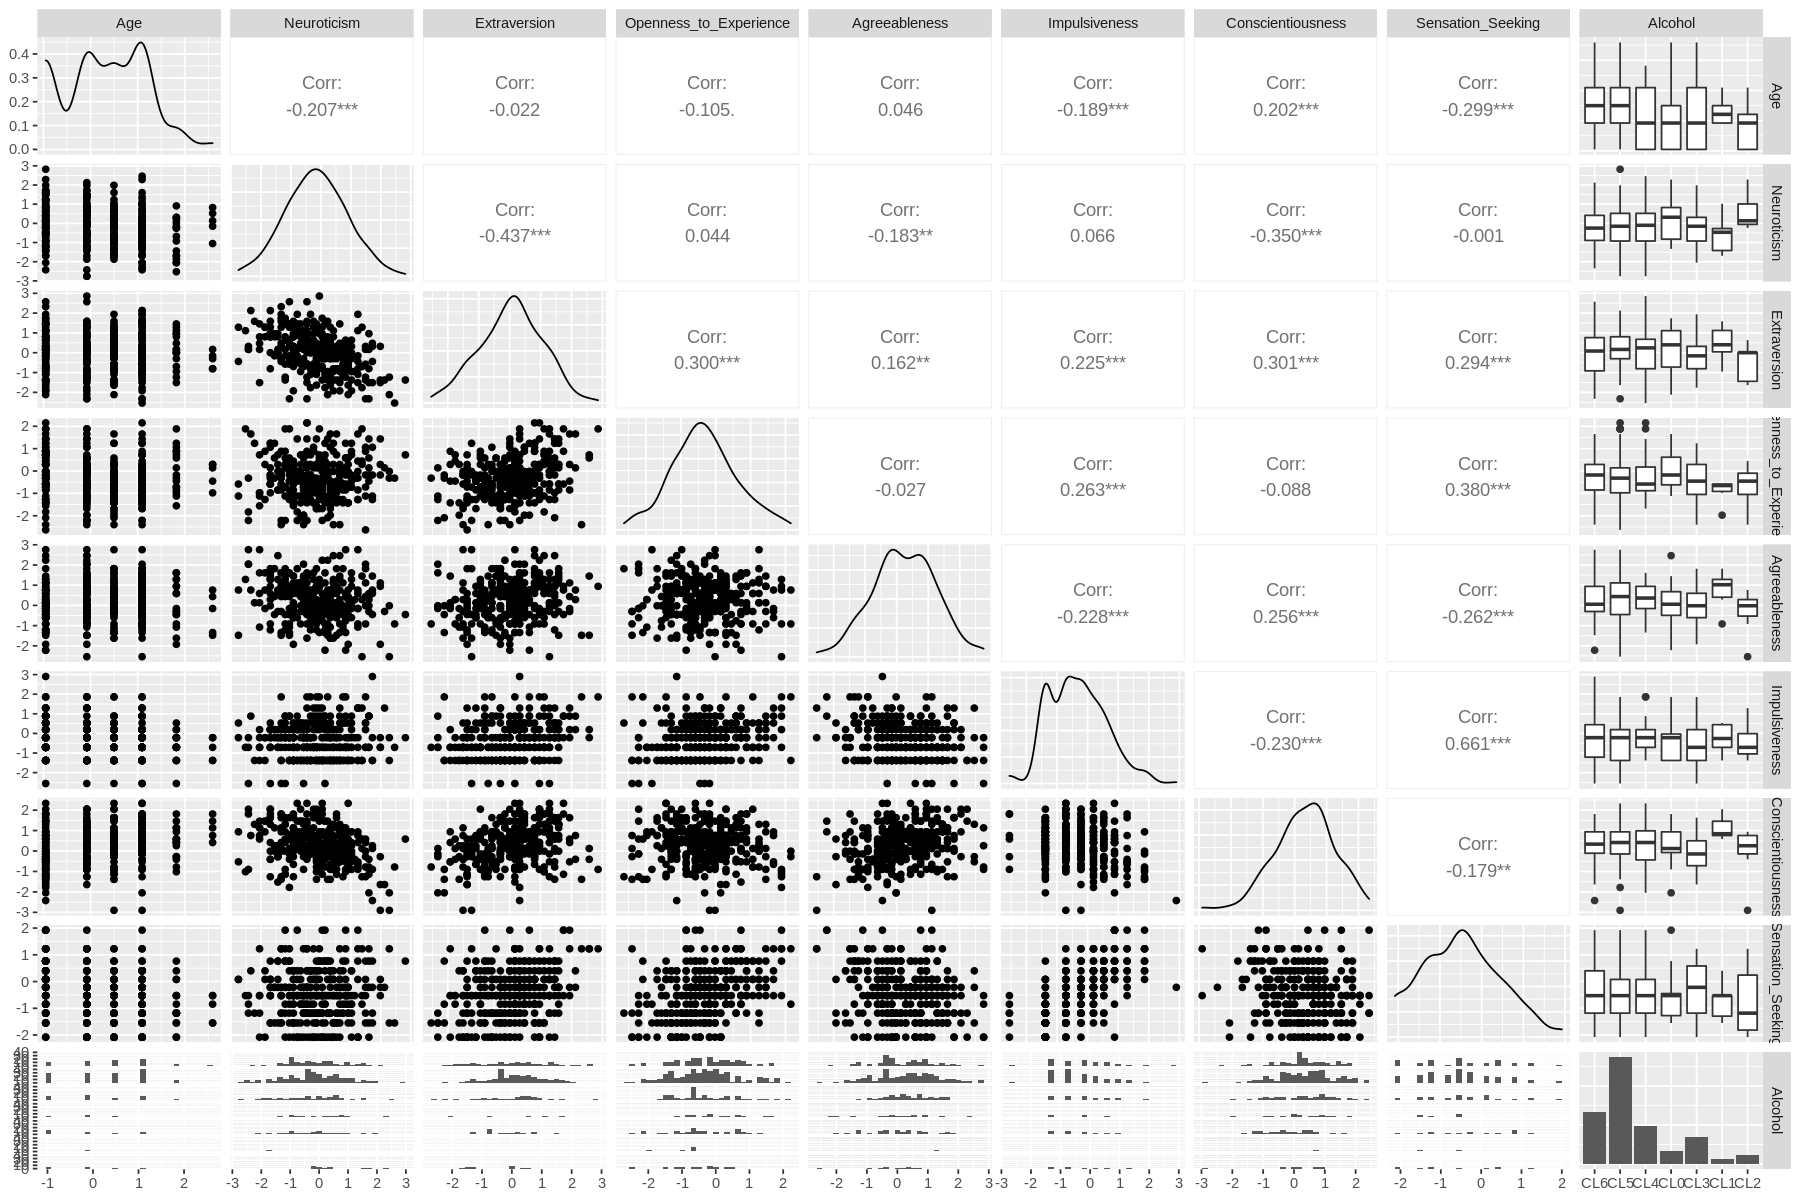

In [46]:
ggpairs(alcohol_train)

### Choose predictors
Chosen predictors:
- Neuroticism
- Agreeableness
- Impulsiveness

(Explain why we chose them)

## Building k-nn classifier

### Build the recipe 

In [47]:
set.seed(6699)

alcohol_recipe <- recipe(Alcohol ~ Impulsiveness + Sensation_Seeking + Extraversion + Age, data = alcohol_train) %>%
                  step_scale(all_predictors()) %>% 
                  step_center(all_predictors())

### Build the model

In [48]:
alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

### Tuning our classifier

In [49]:
alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)
gridvals <- tibble(neighbors = seq(1, 50))

alcohol_results <- workflow() %>% 
    add_recipe(alcohol_recipe) %>% 
    add_model(alcohol_spec) %>% 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) %>% 
    collect_metrics() %>% 
    filter(.metric == "accuracy")


! Fold2: internal:
  No observations were detected in `truth` for level(s): 'CL1'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'CL2'
  Computation will proceed by ignoring those levels.



In [50]:
alcohol_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.2949734,5,0.02264468,Preprocessor1_Model01
2,accuracy,multiclass,0.2949734,5,0.02264468,Preprocessor1_Model02
3,accuracy,multiclass,0.3206173,5,0.02850301,Preprocessor1_Model03
4,accuracy,multiclass,0.3234926,5,0.03039260,Preprocessor1_Model04
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,multiclass,0.4292746,5,0.011068561,Preprocessor1_Model48
49,accuracy,multiclass,0.4260488,5,0.009843236,Preprocessor1_Model49
50,accuracy,multiclass,0.4292746,5,0.011068561,Preprocessor1_Model50


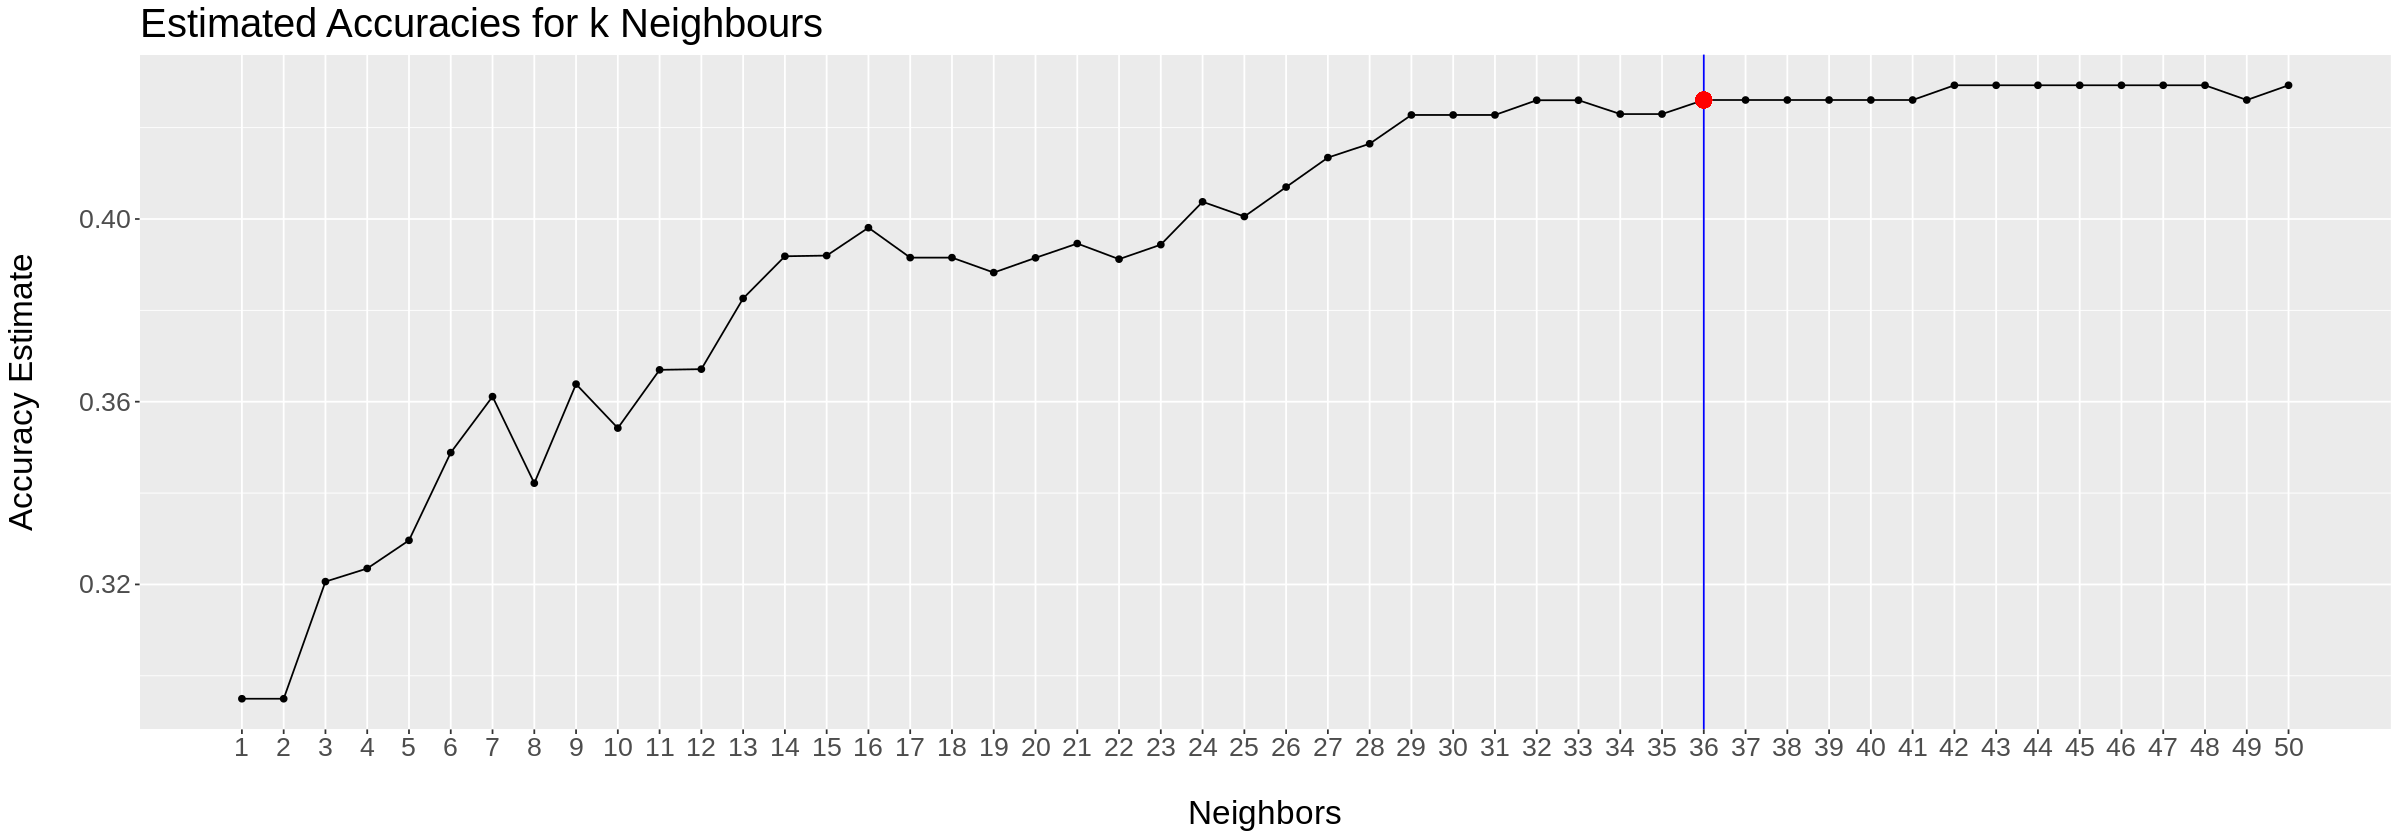

In [51]:
options(repr.plot.width = 20, repr.plot.height = 7)

ky <- alcohol_results %>% filter(neighbors == 36) %>% select(mean) %>% pull()

cross_val_plot <- alcohol_results %>% 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 36, colour = "blue") +
    geom_point(aes(x=36, y= ky), size = 4, colour = "red") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies for k Neighbours") +
    scale_x_continuous(limits = c(1, 50), breaks = seq(1, 50), minor_breaks = seq(1, 50, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

In [52]:
top_k <- alcohol_results |>
         select(neighbors, mean) |>
         arrange(desc(mean))
top_k

neighbors,mean
<int>,<dbl>
42,0.4292746
43,0.4292746
44,0.4292746
45,0.4292746
⋮,⋮
3,0.3206173
1,0.2949734
2,0.2949734


In [53]:
# set.seed(1)

# alcohol_subset1 <- alcohol_train %>% select(Age, Gender, Education, Country, Ethnicity, Neuroticism,
#                        Extraversion, Openness_to_Experience,
#                        Agreeableness, Impulsiveness, Conscientiousness, Alcohol)

# # (Age, Neuroticism, Extraversion, Openness_to_Experience, 
# #                                       Agreeableness, Impulsiveness, Conscientiousness, Alcohol)

# # (Age, Gender, Education, Country, Ethnicity, Neuroticism,
# #                        Extraversion, Openness_to_Experience,
# #                        Agreeableness, Impulsiveness, Conscientiousness, Alcohol)

# names1 <- colnames(alcohol_subset1 %>% select(-Alcohol))

# # create an empty tibble to store the results
# accuracies <- tibble(size = integer(), model_string = character(), accuracy = numeric())

# # create a model specification
# knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
#      set_engine("kknn") %>%
#      set_mode("classification")

# # create a 5-fold cross-validation object
# alcohol_vfold <- vfold_cv(alcohol_subset1, v = 5, strata = Alcohol)

# # store the total number of predictors
# n_total <- length(names1)

# # stores selected predictors
# selected <- c()

# # for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
#     # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names1)) {
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names1[[j]])
#         model_string <- paste("Alcohol", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         alcohol_recipe <- recipe(as.formula(model_string), data = alcohol_subset1) %>%
#                           step_scale(all_predictors()) %>%
#                           step_center(all_predictors())

#         # tune the KNN classifier with these predictors, and collect the accuracy for the best K
#         acc <- workflow() %>%
#           add_recipe(alcohol_recipe) %>%
#           add_model(knn_spec) %>%
#           tune_grid(resamples = alcohol_vfold, grid = 10) %>%
#           collect_metrics() %>%
#           filter(.metric == "accuracy") %>%
#           summarize(mx = max(mean))
#         acc <- acc$mx %>% unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies %>% add_row(size = i, model_string = models[[jstar]], accuracy = accs[[jstar]])
#     selected <- c(selected, names1[[jstar]])
#     names1 <- names1[-jstar]
# }
# accuracies

### KNN Classification

In [54]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 36) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

alcohol_fit <- workflow() %>%
  add_recipe(alcohol_recipe) %>%
  add_model(knn_best_spec) %>%
  fit(data = alcohol_train)

alcohol_predictions <- predict(alcohol_fit, alcohol_test) %>% 
    bind_cols(alcohol_test)

alcohol_predictions

alcohol_acc <- alcohol_predictions %>% 
    metrics(truth = Alcohol, estimate = .pred_class) %>% 
    select(.metric, .estimate) %>% 
    head(1)

alcohol_acc

alcohol_cm <- alcohol_predictions %>% 
    conf_mat(truth = Alcohol, estimate = .pred_class)
alcohol_cm

.pred_class,Age,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Impulsiveness,Conscientiousness,Sensation_Seeking,Alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
CL5,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,CL6
CL5,1.82213,1.37297,-0.15487,-0.17779,-1.92595,-0.71126,-1.51840,-0.21575,CL6
CL5,0.49788,0.04257,-1.50796,-0.71727,0.28783,0.19268,1.30612,-0.52593,CL6
CL5,0.49788,-0.24649,-0.57545,-0.17779,-0.01729,-0.21712,-1.51840,-0.21575,CL6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CL5,-0.95197,-0.79151,0.32197,1.88511,-1.07533,-0.21712,-0.78155,0.40148,CL3
CL5,-0.95197,-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,CL5
CL5,2.59171,2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,CL5


.metric,.estimate
<chr>,<dbl>
accuracy,0.4220183


          Truth
Prediction CL6 CL5 CL4 CL0 CL3 CL1 CL2
       CL6   0   1   0   0   0   0   0
       CL5  23  46  16   5  11   3   3
       CL4   0   0   0   0   0   0   0
       CL0   0   0   0   0   0   0   0
       CL3   0   0   1   0   0   0   0
       CL1   0   0   0   0   0   0   0
       CL2   0   0   0   0   0   0   0